# XP model

In [56]:
import os
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mplsoccer.pitch import Pitch
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.colorbar as cbar

from sklearn.metrics import log_loss

from IPython.display import display

pd.set_option('display.max_columns', 200)
pd.set_option('mode.chained_assignment', None)

In [2]:
data_path = '/Users/mfelici/personal_projects/football/data/statsbomb/open-data/data/'

#### Load competitions

In [3]:
competitions = pd.read_json(os.path.join(data_path, 'competitions.json'))
competitions = competitions.loc[competitions['competition_name'] == 'La Liga']

print(competitions.shape)
competitions

(16, 8)


,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
18,11,42,Spain,La Liga,male,2019/2020,2020-12-18T12:10:38.985394,2020-12-18T12:10:38.985394
19,11,4,Spain,La Liga,male,2018/2019,2021-04-20T03:24:51.029365,2021-04-20T03:24:51.029365
20,11,1,Spain,La Liga,male,2017/2018,2021-05-19T08:38:06.507959,2021-05-19T08:38:06.507959
21,11,2,Spain,La Liga,male,2016/2017,2021-05-19T18:19:46.267118,2021-05-19T18:19:46.267118
22,11,27,Spain,La Liga,male,2015/2016,2020-07-29T05:00,2020-07-29T05:00
23,11,26,Spain,La Liga,male,2014/2015,2020-07-29T05:00,2020-07-29T05:00
24,11,25,Spain,La Liga,male,2013/2014,2020-07-29T05:00,2020-07-29T05:00
25,11,24,Spain,La Liga,male,2012/2013,2020-07-29T05:00,2020-07-29T05:00
26,11,23,Spain,La Liga,male,2011/2012,2020-07-29T05:00,2020-07-29T05:00
27,11,22,Spain,La Liga,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00


#### Load matches

In [4]:
match_dfs = []
for file in os.listdir(os.path.join(data_path, 'matches/11')):
    with open(os.path.join(data_path, 'matches/11', file), 'r') as f:
        match_dfs.append(pd.json_normalize(json.load(f)))

matches = pd.concat(match_dfs, 0).reset_index(drop=True)

del match_dfs
print(matches.shape)
matches.head()

(485, 42)


,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,metadata.shot_fidelity_version,metadata.xy_fidelity_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name
0,69225,2008-12-13,22:00:00.000,2,0,available,unscheduled,2020-07-29T05:00,None,15,11,Spain,La Liga,41,2008/2009,217,Barcelona,male,None,214,Spain,"[{'id': 36, 'name': 'Josep Guardiola i Sala', ...",220,Real Madrid,male,None,214,Spain,"[{'id': 3899, 'name': 'Juan de la Cruz Ramos C...",1.1.0,2,2,1,Regular Season,342.0,Camp Nou,214.0,Spain,1011.0,Luis Medina Cantalejo,214.0,Spain
1,69212,2008-10-04,22:00:00.000,6,1,available,unscheduled,2020-07-29T05:00,None,6,11,Spain,La Liga,41,2008/2009,217,Barcelona,male,None,214,Spain,"[{'id': 36, 'name': 'Josep Guardiola i Sala', ...",212,Atlético Madrid,male,None,214,Spain,"[{'id': 3196, 'name': 'Javier Aguirre Onaindía...",1.1.0,2,2,1,Regular Season,342.0,Camp Nou,214.0,Spain,1070.0,Iturralde,NaN,NaN
2,69235,2008-11-01,20:00:00.000,1,4,available,unscheduled,2020-07-29T05:00,None,9,11,Spain,La Liga,41,2008/2009,223,Málaga,male,None,214,Spain,"[{'id': 4989, 'name': 'Antonio Tapia Flores', ...",217,Barcelona,male,None,214,Spain,"[{'id': 36, 'name': 'Josep Guardiola i Sala', ...",1.1.0,2,2,1,Regular Season,346.0,Estadio La Rosaleda,214.0,Spain,407.0,Carlos Velasco Carballo,214.0,Spain
3,69232,2008-10-25,22:00:00.000,5,0,available,unscheduled,2020-07-29T05:00,None,8,11,Spain,La Liga,41,2008/2009,217,Barcelona,male,None,214,Spain,NaN,403,Almería,male,None,214,Spain,NaN,1.1.0,2,2,1,Regular Season,342.0,Camp Nou,214.0,Spain,1007.0,Alfonso Perez Burrull,NaN,NaN
4,69216,2009-03-07,20:00:00.000,2,0,available,unscheduled,2020-07-29T05:00,None,26,11,Spain,La Liga,41,2008/2009,217,Barcelona,male,None,214,Spain,"[{'id': 36, 'name': 'Josep Guardiola i Sala', ...",215,Athletic Bilbao,male,None,214,Spain,"[{'id': 497, 'name': 'Joaquín de Jesús Caparró...",1.1.0,2,2,1,Regular Season,342.0,Camp Nou,214.0,Spain,221.0,Alberto Undiano,112.0,Italy


## Load events
We look only after passes features

In [78]:
passes_dfs = []
tot = matches.shape[0]
cols = ['id', 'match_id', 'team_id', 'player_id', 'recipient_id', 'x_pass', 'y_pass', 'x_pass_end',
        'y_pass_end', 'body_part', 'technique', 'outcome', 'pass_type', 'play_pattern', 'player_role',
        'length', 'angle', 'pass_height', 'switch', 'through_ball', 'cross', 'cut_back']

for i, match_id in enumerate(matches['match_id'].unique()):
    
    file = os.path.join(data_path, f'events/{match_id}.json')
    
    print(match_id, '{} / {}'.format(i+1, tot)) 
    
    with open(file, 'r') as f:
        df = pd.json_normalize(json.load(f))
        
    # Retrieve shots
    tmp = df.loc[(df['type.name'] == 'Pass')]

    # Data prep
    tmp['match_id'] = match_id
    tmp['x_pass'] = tmp['location'].apply(lambda x: x[0])
    tmp['y_pass'] = tmp['location'].apply(lambda x: x[1])
    tmp['x_pass_end'] = tmp['pass.end_location'].apply(lambda x: x[0])
    tmp['y_pass_end'] = tmp['pass.end_location'].apply(lambda x: x[1])
    tmp['z_pass_end'] = tmp['pass.end_location'].apply(lambda x: np.nan if len(x) <= 3 else x[2])


    tmp.rename(columns={'pass.body_part.name': 'body_part',
                        'pass.technique.name': 'technique',
                        'pass.outcome.name': 'outcome',
                        'pass.type.name': 'pass_type',
                        'team.id': 'team_id',
                        'player.id': 'player_id',
                        'pass.recipient.id': 'recipient_id',
                        'play_pattern.name': 'play_pattern',
                        'position.name': 'player_role',
                        'pass.length': 'length',
                        'pass.angle': 'angle',
                        'pass.height.name': 'pass_height',
                        'pass.switch': 'switch',
                        'pass.through_ball': 'through_ball',
                        'pass.goal_assist': 'goal_assist',
                        'pass.inswinging': 'inswinging',
                        'pass.shot_assist': 'shot_assist',
                        'pass.cross': 'cross',
                        'pass.cut_back': 'cut_back',
                        'pass.no_touch': 'no_touch',
                        'pass.aerial_won': 'aerial_won',
                        'pass.deflected': 'deflected',
                        'pass.straight': 'straight'}, inplace=True)
    for x in cols:
        if x not in tmp.columns:
            tmp[x] = None
    tmp = tmp[['id', 'match_id', 'team_id', 'player_id', 'recipient_id', 'x_pass', 'y_pass', 'x_pass_end',
               'y_pass_end', 'body_part', 'technique', 'outcome', 'pass_type', 'play_pattern', 'player_role',
               'length', 'angle', 'pass_height', 'switch', 'through_ball', 'cross', 'cut_back']]
    
    # Check out for carries before pass
    ind_carries = np.where(df['type.name'] == 'Pass')[0] - 1
    carries = df.loc[(df['type.name'] == 'Carry'), ['location', 'carry.end_location']]
    # Set index+1 to (eventually) join with subsequent pass
    carries = carries.reset_index()
    carries['index'] += 1
    carries = carries.set_index('index')
    carries.rename(columns={'location': 'carry_start_location',
                             'carry.end_location': 'carry_end_location'}, inplace=True)
    
    tmp = tmp.merge(carries, how='left', left_index=True, right_index=True)

    passes_dfs.append(tmp)
    
    
# Put all together
passes = pd.concat(passes_dfs, 0).reset_index(drop=True)

passes.head()

69225 1 / 485
69212 2 / 485
69235 3 / 485
69232 4 / 485
69216 5 / 485
69209 6 / 485
69231 7 / 485
69217 8 / 485
69273 9 / 485
69223 10 / 485
69222 11 / 485
69195 12 / 485
69251 13 / 485
69185 14 / 485
69142 15 / 485
69139 16 / 485
69189 17 / 485
69171 18 / 485
69249 19 / 485
69215 20 / 485
69138 21 / 485
69147 22 / 485
69149 23 / 485
69177 24 / 485
69207 25 / 485
69228 26 / 485
69183 27 / 485
69279 28 / 485
69285 29 / 485
69230 30 / 485
69211 31 / 485
69144 32 / 485
69151 33 / 485
69169 34 / 485
68360 35 / 485
69186 36 / 485
69180 37 / 485
69143 38 / 485
69181 39 / 485
68365 40 / 485
69178 41 / 485
68364 42 / 485
69170 43 / 485
68359 44 / 485
68356 45 / 485
69158 46 / 485
69187 47 / 485
68363 48 / 485
69166 49 / 485
68366 50 / 485
69148 51 / 485
69145 52 / 485
69184 53 / 485
69173 54 / 485
69146 55 / 485
69182 56 / 485
68358 57 / 485
68361 58 / 485
69141 59 / 485
68314 60 / 485
68313 61 / 485
68316 62 / 485
68315 63 / 485
69153 64 / 485
68352 65 / 485
68353 66 / 485
69243 67 / 485
6924

,id,match_id,team_id,player_id,recipient_id,x_pass,y_pass,x_pass_end,y_pass_end,body_part,technique,outcome,pass_type,play_pattern,player_role,length,angle,pass_height,switch,through_ball,cross,cut_back,carry_start_location,carry_end_location
0,92034991-a772-4aa2-aa5c-9a3678f2a0d1,69225,220,5497.0,15607.0,61.0,41.0,61.4,44.9,Right Foot,NaN,NaN,Kick Off,From Kick Off,Right Center Forward,3.920459,1.468590,Ground Pass,NaN,NaN,NaN,NaN,NaN,NaN
1,7b5c0237-4dd8-4c61-85dc-393678cd3e95,69225,220,15607.0,4409.0,61.8,44.9,53.9,45.5,Left Foot,NaN,NaN,NaN,From Kick Off,Left Center Forward,7.922752,3.065789,Ground Pass,NaN,NaN,NaN,NaN,NaN,NaN
2,3751aabf-75b9-4933-9c72-2bafd3513cb2,69225,220,4409.0,26036.0,52.6,44.9,49.9,33.4,Left Foot,NaN,NaN,NaN,From Kick Off,Right Midfield,11.812705,-1.801402,Ground Pass,NaN,NaN,NaN,NaN,"[53.9, 45.5]","[52.6, 44.9]"
3,f5ce859a-a5a7-43e7-8cc8-7b09a42e6c4e,69225,220,26036.0,20014.0,49.2,33.4,35.8,35.5,Right Foot,NaN,NaN,NaN,From Kick Off,Right Center Midfield,13.563554,2.986141,Ground Pass,NaN,NaN,NaN,NaN,NaN,NaN
4,288bf2c6-528d-40fb-9969-31452639e56d,69225,220,20014.0,15775.0,36.8,35.0,38.1,48.1,Right Foot,NaN,NaN,NaN,From Kick Off,Left Center Back,13.164346,1.471883,Ground Pass,NaN,NaN,NaN,NaN,"[35.8, 35.5]","[36.8, 35.0]"


In [ ]:
# Let's create the output variable "goal"
passes['success'] = 0
passes.loc[passes['outcome'].isnull(), 'success'] = 1

In [22]:
# Save results
passes.to_feather('data/passes_laliga')
passes = passes.loc[
    (passes['body_part'].isin(['Left Foot', 'Right Foot'])) &
    (passes['pass_type'].isin(['Throw-in', 'Free Kick', 'Goal Kick', 'Corner', 'Kick Off']) == False)
]

In [5]:
# Reload results
passes = pd.read_feather('data/passes_laliga')
passes = passes.loc[
    (passes['body_part'].isin(['Left Foot', 'Right Foot'])) &
    (passes['pass_type'].isin(['Throw-in', 'Free Kick', 'Goal Kick', 'Corner', 'Kick Off']) == False)
]

## Pass analysis

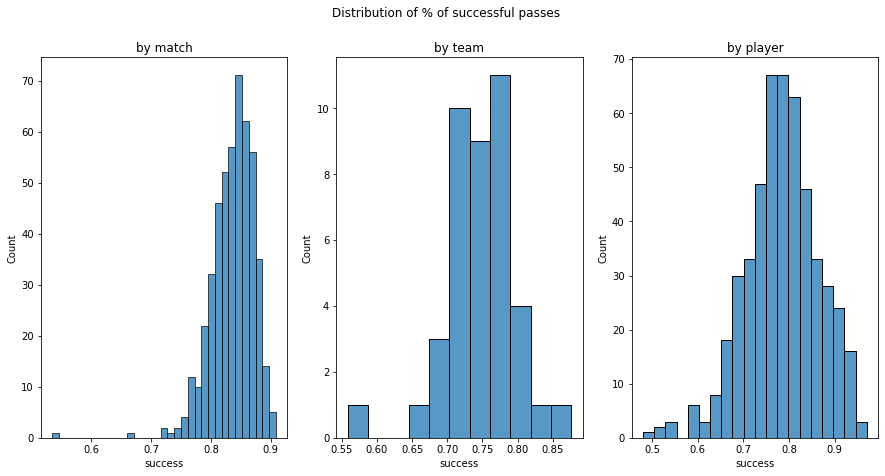

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

plt.suptitle('Distribution of % of successful passes')

sns.histplot(data=passes.groupby('match_id').agg({'success': 'mean'}), x='success', ax=axs[0])
axs[0].set_title('by match')

sns.histplot(data=passes.groupby('team_id').agg({'success': 'mean'}), x='success', ax=axs[1])
axs[1].set_title('by team')

hist = passes.groupby('player_id').agg({'success': ['mean', 'count']})
hist.columns = ['success', 'count']
# Remove players with too few passes
hist = hist.loc[hist['count'] > 100]

sns.histplot(data=hist, x='success', ax=axs[2])
axs[2].set_title('by player')

plt.show()

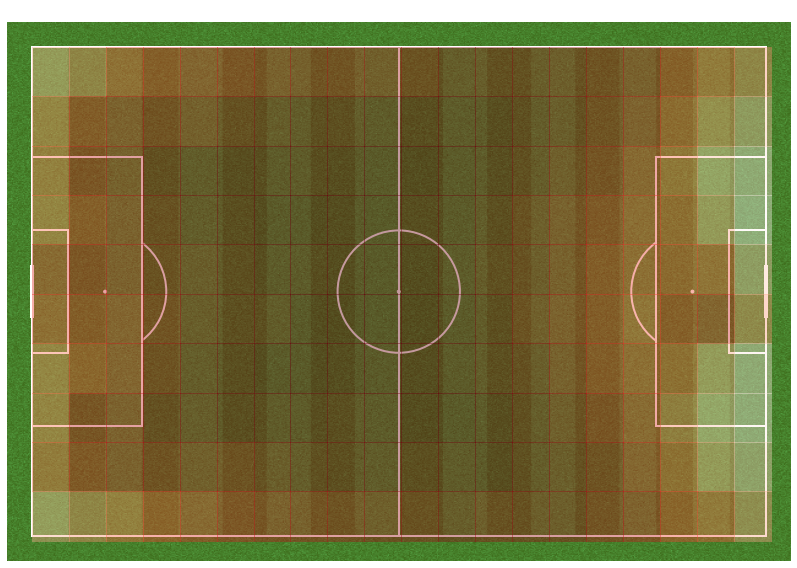

In [7]:
# Calculate success rate with numpy 2d histogram
counts, xbins, ybins = np.histogram2d(passes['x_pass'], passes['y_pass'], bins=(20, 10))
sums, _, _ = np.histogram2d(passes['x_pass'], passes['y_pass'], weights=passes['success'], bins=(xbins, ybins))

cmap = plt.cm.Reds

cNorm  = colors.Normalize(vmin=0, vmax=1)

scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

pitch = Pitch(pitch_color='grass', line_color='white', orientation='horizontal', view='full', stripe=True, figsize=(12, 8))
pitch.draw()

plt.pcolormesh(xbins, ybins, (sums / counts).T, cmap=cmap, alpha=0.4)
plt.title('Success rate per field zone', color='white')
    
plt.show()

<ipython-input-8-3e68ba5313e3>:13: RuntimeWarning: invalid value encountered in true_divide
  plt.pcolormesh(xbins, ybins, (sums / counts).T, cmap=cmap, alpha=0.9)


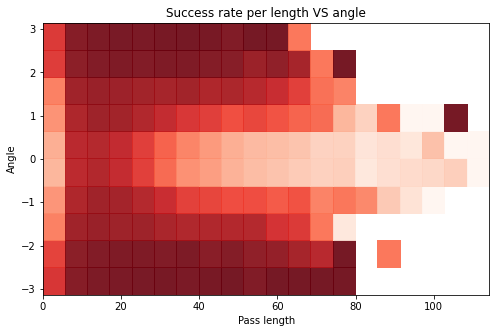

In [8]:
# Calculate success rate with numpy 2d histogram
counts, xbins, ybins = np.histogram2d(passes['length'], passes['angle'], bins=(20, 10))
sums, _, _ = np.histogram2d(passes['length'], passes['angle'], weights=passes['success'], bins=(xbins, ybins))

cmap = plt.cm.Reds

cNorm  = colors.Normalize(vmin=0, vmax=1)

scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

plt.figure(figsize=(8, 5))

plt.pcolormesh(xbins, ybins, (sums / counts).T, cmap=cmap, alpha=0.9)
plt.title('Success rate per length VS angle')
plt.xlabel('Pass length')
plt.ylabel('Angle')
    
plt.show()

Definition of **angle**, from Statsbomb documentation:

*the angle of the pass in radians, with 0 pointing straight ahead, positive values between 0 and π indicating an angle clockwise, and negative values between 0 and -π representing an angle anti-clockwise.*

## xP model
I want to build a model on data except last season (`id 42`). I will use that season's data to apply the model a draw conclusions about players.

In [13]:
last_season_matches = matches.loc[matches['season.season_id'] == 42, 'match_id'].values
last_season = passes.loc[passes['match_id'].isin(last_season_matches)]
passes = passes.loc[passes['match_id'].isin(last_season_matches) == False]

### Train/test split

In [37]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    passes.drop(['id', 'match_id', 'team_id', 'player_id', 'recipient_id', 'x_pass_end',
                 'y_pass_end', 'outcome', 'player_role'], 1),
    test_size=0.25, stratify=passes['success'], random_state=1123
)
test, valid = train_test_split(test, test_size=0.7, stratify=test['success'], random_state=1123)

train.reset_index(drop=True, inplace=True)
valid.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

print('Train: {} records, passes success % {}\nValidation: {} records, passes success % {}\nTest: {} records, passes success % {}'.format(
    len(train), round(train['success'].mean() * 100, 3),
    len(valid), round(valid['success'].mean() * 100, 3),
    len(test), round(test['success'].mean() * 100, 3)
))

Train: 295839 records, passes success % 83.74
Validation: 69030 records, passes success % 83.739
Test: 29584 records, passes success % 83.741


### Feature engineering

In [39]:
def feat_eng(df_input):
    df = df_input.copy()
    # Boolean features to int
    for feat in ['switch', 'through_ball', 'cross', 'cut_back']:
        df[feat] = df[feat].fillna(False).astype(int)
    
    df['has_been_carried'] = (df['carry_start_location'].isnull() == False).astype(int)
    df['carry_distance'] = df.apply(
        lambda x: np.sqrt((x['carry_start_location'][0] - x['x_pass']) ** 2 +
                          (x['carry_start_location'][1] - x['y_pass']) ** 2)
                  if x['carry_start_location'] is not None else 0, 1
    )
    
    for feat in ['technique', 'pass_type']:
        df[feat] = df[feat].fillna('Normal')
        
    df.drop(['carry_start_location', 'carry_end_location'], 1, inplace=True)
        
    return df
    
train = feat_eng(train)
valid = feat_eng(valid)
test = feat_eng(test)

#### Exploratory analysis

In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
x_pass,295839.0,61.240416,25.090810,0.100000,43.400000,62.700000,79.300000,120.900000
y_pass,295839.0,40.598982,22.153714,0.300000,21.900000,40.700000,59.400000,80.800000
length,295839.0,19.706325,12.603999,0.000000,11.042191,16.376812,24.777610,114.236595
angle,295839.0,0.014457,1.585251,-3.138021,-1.249046,0.000000,1.292497,3.141593
switch,295839.0,0.026717,0.161256,0.000000,0.000000,0.000000,0.000000,1.000000
through_ball,295839.0,0.009360,0.096293,0.000000,0.000000,0.000000,0.000000,1.000000
cross,295839.0,0.021035,0.143502,0.000000,0.000000,0.000000,0.000000,1.000000
cut_back,295839.0,0.002109,0.045878,0.000000,0.000000,0.000000,0.000000,1.000000
success,295839.0,0.837398,0.369003,0.000000,1.000000,1.000000,1.000000,1.000000
has_been_carried,295839.0,0.695632,0.460140,0.000000,0.000000,1.000000,1.000000,1.000000


In [19]:
train.describe(include='O').T

,count,unique,top,freq
body_part,295839,2,Right Foot,205950
technique,295839,2,Normal,293070
pass_type,295839,3,Normal,277926
play_pattern,295839,9,Regular Play,145715
pass_height,295839,3,Ground Pass,229760


In [20]:
train.corr()['success']

x_pass             -0.069024
y_pass             -0.007126
length             -0.196451
angle               0.006653
switch             -0.038162
through_ball       -0.107285
cross              -0.212643
cut_back           -0.046830
success             1.000000
has_been_carried    0.059001
carry_distance     -0.008089
Name: success, dtype: float64

### First model - Log Regression adding one variable at a time

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
# Add distance
lr_model = smf.glm(formula="success ~ length", data=train, family=sm.families.Binomial()).fit()
print(lr_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                success   No. Observations:               295839
Model:                            GLM   Df Residuals:                   295837
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2633e+05
Date:                Fri, 09 Jul 2021   Deviance:                   2.5265e+05
Time:                        08:24:53   Pearson chi2:                 3.09e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4089      0.010    250.470      0.0

In [23]:
# Add angle
lr_model = smf.glm(formula="success ~ length + angle", data=train, family=sm.families.Binomial()).fit()
print(lr_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                success   No. Observations:               295839
Model:                            GLM   Df Residuals:                   295836
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2632e+05
Date:                Fri, 09 Jul 2021   Deviance:                   2.5265e+05
Time:                        08:24:54   Pearson chi2:                 3.09e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4087      0.010    250.439      0.0

In [24]:
# Add x coordinate
lr_model = smf.glm(formula="success ~ length + angle + x_pass", data=train, family=sm.families.Binomial()).fit()
print(lr_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                success   No. Observations:               295839
Model:                            GLM   Df Residuals:                   295835
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2422e+05
Date:                Fri, 09 Jul 2021   Deviance:                   2.4843e+05
Time:                        08:24:54   Pearson chi2:                 3.12e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4125      0.019    178.985      0.0

In [25]:
# Is the ball been carried?
lr_model = smf.glm(formula="success ~ length + angle + x_pass + has_been_carried", data=train, family=sm.families.Binomial()).fit()
print(lr_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                success   No. Observations:               295839
Model:                            GLM   Df Residuals:                   295834
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2341e+05
Date:                Fri, 09 Jul 2021   Deviance:                   2.4683e+05
Time:                        08:24:55   Pearson chi2:                 3.10e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.1698      0.020  

In [26]:
# For how long?
lr_model = smf.glm(formula="success ~ length + angle + x_pass + has_been_carried * carry_distance", data=train, family=sm.families.Binomial()).fit()
print(lr_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                success   No. Observations:               295839
Model:                            GLM   Df Residuals:                   295833
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2339e+05
Date:                Fri, 09 Jul 2021   Deviance:                   2.4677e+05
Time:                        08:24:56   Pearson chi2:                 3.10e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [27]:
# For how long?
lr_model = smf.glm(formula="success ~ length + angle + x_pass + has_been_carried * carry_distance +"
                           "switch + through_ball + cross + cut_back",
                   data=train, family=sm.families.Binomial()).fit()
print(lr_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                success   No. Observations:               295839
Model:                            GLM   Df Residuals:                   295829
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1971e+05
Date:                Fri, 09 Jul 2021   Deviance:                   2.3942e+05
Time:                        08:24:57   Pearson chi2:                 3.11e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [28]:
# Technique and pass type
lr_model = smf.glm(formula="success ~ length + angle + x_pass + has_been_carried * carry_distance +"
                           "switch + through_ball + cross + cut_back + C(technique) + C(pass_type)",
                   data=train, family=sm.families.Binomial()).fit()
print(lr_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                success   No. Observations:               295839
Model:                            GLM   Df Residuals:                   295827
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1954e+05
Date:                Fri, 09 Jul 2021   Deviance:                   2.3908e+05
Time:                        08:25:00   Pearson chi2:                 3.12e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [29]:
# Technique and pass type
lr_model = smf.glm(formula="success ~ length + angle + x_pass + has_been_carried * carry_distance +"
                           "switch + through_ball + cross + cut_back + C(technique) + C(pass_type) +"
                           "C(body_part) + C(play_pattern) + C(pass_height)",
                   data=train, family=sm.families.Binomial()).fit()
print(lr_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                success   No. Observations:               295839
Model:                            GLM   Df Residuals:                   295816
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0563e+05
Date:                Fri, 09 Jul 2021   Deviance:                   2.1127e+05
Time:                        08:25:06   Pearson chi2:                 2.89e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [40]:
lr_xp_train = lr_model.predict(train)
lr_xp_valid = lr_model.predict(valid)

print('Log loss')
print('Train: ', -log_loss(train['success'], lr_xp_train), '\nValidation: ', -log_loss(valid['success'], lr_xp_valid))
lr_xp_train.describe()

Log loss
Train:  -0.35706750115719665 
Validation:  -0.3583015505252907


count    295839.000000
mean          0.837398
std           0.172130
min           0.022391
25%           0.866662
50%           0.912947
75%           0.930294
max           0.987842
dtype: float64

### Another model - Gradient Boosting

In [32]:
from catboost import CatBoostClassifier

In [41]:
gboost = CatBoostClassifier(random_seed=1123, l2_leaf_reg=10, subsample=0.6, depth=3, rsm=0.4, n_estimators=10000, eval_metric='Logloss')

gboost.fit(train.drop('success', 1), train['success'],
           cat_features=['technique', 'pass_type', 'body_part', 'play_pattern', 'pass_height'],
           eval_set=(valid.drop('success', 1), valid['success']),
           early_stopping_rounds=25)

0:	learn: 0.6748521	test: 0.6749034	best: 0.6749034 (0)	total: 36.5ms	remaining: 6m 5s
1:	learn: 0.6559553	test: 0.6559797	best: 0.6559797 (1)	total: 73.8ms	remaining: 6m 8s
2:	learn: 0.6385541	test: 0.6386011	best: 0.6386011 (2)	total: 110ms	remaining: 6m 6s
3:	learn: 0.6209820	test: 0.6209949	best: 0.6209949 (3)	total: 144ms	remaining: 5m 58s
4:	learn: 0.6058548	test: 0.6058595	best: 0.6058595 (4)	total: 181ms	remaining: 6m 1s
5:	learn: 0.5877707	test: 0.5877918	best: 0.5877918 (5)	total: 224ms	remaining: 6m 13s
6:	learn: 0.5714611	test: 0.5715062	best: 0.5715062 (6)	total: 261ms	remaining: 6m 12s
7:	learn: 0.5579997	test: 0.5580038	best: 0.5580038 (7)	total: 300ms	remaining: 6m 14s
8:	learn: 0.5424778	test: 0.5424729	best: 0.5424729 (8)	total: 332ms	remaining: 6m 8s
9:	learn: 0.5285907	test: 0.5286182	best: 0.5286182 (9)	total: 368ms	remaining: 6m 7s
10:	learn: 0.5159878	test: 0.5160083	best: 0.5160083 (10)	total: 399ms	remaining: 6m 2s
11:	learn: 0.5034677	test: 0.5034657	best: 0.5

In [42]:
gb_xp = gboost.predict_proba(train)[:, 1]
gb_xp_valid = gboost.predict_proba(valid)[:, 1]

print('Train log loss: ', -log_loss(train['success'], gb_xp))
print('Valid log loss: ', -log_loss(valid['success'], gb_xp_valid))

Train log loss:  -0.26546663463345443
Valid log loss:  -0.27024905569565016


In [43]:
gboost.save_model('xp_model')

#### Comparing results

In [44]:
lr_xp_test = lr_model.predict(test)
gb_xp_test = gboost.predict_proba(test)[:, 1]

print('Log Regression log loss: ', -log_loss(test['success'], lr_xp_test))
print('GBoost log loss: ', -log_loss(test['success'], gb_xp_test))

Log Regression log loss:  -0.35263172902338075
GBoost log loss:  -0.269110346773037


Due to better performances, we will use the Gradient Boosting model for the final evaulation.

## Analysis on 2019/2020 season
The idea is to assign the xP value to each pass and then compare (player-wise and team-wise) the expected result with the actual rate of success.

In [47]:
last_season = feat_eng(last_season)
last_season['xP'] = gboost.predict_proba(
    last_season.drop(['id', 'match_id', 'team_id', 'player_id', 'recipient_id',
                      'x_pass_end', 'y_pass_end', 'outcome', 'player_role'], 1)
)[:, 1]
last_season.head()

,id,match_id,team_id,player_id,recipient_id,x_pass,y_pass,x_pass_end,y_pass_end,body_part,technique,outcome,pass_type,play_pattern,player_role,length,angle,pass_height,switch,through_ball,cross,cut_back,success,has_been_carried,carry_distance,xP
339465,c16adabc-7b2e-45a9-9389-906864aaff46,303421,217,5203.0,6826.0,43.8,40.4,36.4,31.4,Right Foot,Normal,None,Normal,From Kick Off,Center Defensive Midfield,11.651609,-2.258941,Ground Pass,0,0,0,0,1,0,0.000000,0.983854
339466,5c21c429-9f0d-49b3-9288-7feabb75fc7c,303421,217,6826.0,5203.0,35.6,31.4,34.5,39.1,Left Foot,Normal,None,Normal,From Kick Off,Left Center Back,7.778174,1.712693,Ground Pass,0,0,0,0,1,1,0.800000,0.963201
339467,6283612f-447a-4394-b447-751afaa2a27b,303421,217,5203.0,6826.0,40.8,39.8,41.9,20.7,Right Foot,Normal,None,Normal,From Kick Off,Center Defensive Midfield,19.131649,-1.513268,Ground Pass,0,0,0,0,1,1,6.338770,0.988869
339468,61d79761-aee1-41c5-bc47-2451747d1774,303421,217,6826.0,24841.0,49.2,20.6,51.0,26.5,Left Foot,Normal,None,Normal,From Kick Off,Left Center Back,6.168468,1.274681,Ground Pass,0,0,0,0,1,1,7.300685,0.871032
339469,c80475f2-d233-4679-b599-9f1a5587a0a2,303421,217,24841.0,5203.0,50.4,26.5,32.5,39.8,Right Foot,Normal,None,Normal,From Kick Off,Left Center Midfield,22.300224,2.502576,Ground Pass,0,0,0,0,1,1,0.600000,0.994323


In [50]:
matches.columns

Index(['match_id', 'match_date', 'kick_off', 'home_score', 'away_score',
       'match_status', 'match_status_360', 'last_updated', 'last_updated_360',
       'match_week', 'competition.competition_id', 'competition.country_name',
       'competition.competition_name', 'season.season_id',
       'season.season_name', 'home_team.home_team_id',
       'home_team.home_team_name', 'home_team.home_team_gender',
       'home_team.home_team_group', 'home_team.country.id',
       'home_team.country.name', 'home_team.managers',
       'away_team.away_team_id', 'away_team.away_team_name',
       'away_team.away_team_gender', 'away_team.away_team_group',
       'away_team.country.id', 'away_team.country.name', 'away_team.managers',
       'metadata.data_version', 'metadata.shot_fidelity_version',
       'metadata.xy_fidelity_version', 'competition_stage.id',
       'competition_stage.name', 'stadium.id', 'stadium.name',
       'stadium.country.id', 'stadium.country.name', 'referee.id',
       're

In [52]:
teamwise = last_season.groupby('team_id')[['success', 'xP']].sum()
teamwise['ratio'] = teamwise['success'] / teamwise['xP']

teams = matches[['home_team.home_team_id', 'home_team.home_team_name']].drop_duplicates()
teams.columns = ['id', 'team']

teamwise.merge(teams, left_index=True, right_on='id').drop('id', 1).sort_values('ratio', ascending=False)

,success,xP,ratio,team
13,446,419.355782,1.063536,Atlético Madrid
18,849,810.292673,1.047770,Real Madrid
11,218,208.436170,1.045884,Real Betis
38,162,155.155169,1.044116,Athletic Bilbao
120,820,789.377196,1.038794,Real Sociedad
0,19850,19226.639525,1.032422,Barcelona
32,516,509.735297,1.012290,Levante
25,664,662.719629,1.001932,Villarreal
192,473,473.341150,0.999279,Deportivo Alavés
138,537,539.147843,0.996016,Celta Vigo


In [58]:
playerwise = last_season.groupby('player_id')[['success', 'xP']].sum()
playerwise['ratio'] = playerwise['success'] / playerwise['xP']

display(playerwise.loc[playerwise['success'] > 50].sort_values('ratio', ascending=False).head(10))
display(playerwise.loc[playerwise['success'] > 50].sort_values('ratio', ascending=False).tail(10))

,success,xP,ratio
player_id,,,
5721.0,94,84.129251,1.117328
8252.0,94,85.577127,1.098424
6866.0,51,46.813276,1.089435
20055.0,769,709.159831,1.084382
13599.0,133,123.164412,1.079857
6892.0,84,78.586243,1.068889
24088.0,66,61.748864,1.068846
4926.0,75,70.221625,1.068047
5504.0,100,94.125089,1.062416


,success,xP,ratio
player_id,,,
18620.0,73,74.472407,0.980229
6773.0,73,74.773226,0.976285
24084.0,52,53.296150,0.975680
24072.0,72,74.217066,0.970127
6599.0,54,55.849461,0.966885
7105.0,64,66.223930,0.966418
6701.0,57,59.021200,0.965755
6618.0,51,52.891130,0.964245
5246.0,421,437.616285,0.962030


- 5721 Dani Carvajal
- 8252 Odegaard
- 6866 Marc roca
- 20055 ter Stegen
- 13599 Cales Alena
- 5574 Toni Kroos
- 5211 Jordi Alba